<a href="https://colab.research.google.com/github/Anish32/indian-school-/blob/main/school_education_usig_linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
df=pd.read_csv('/content/dropout-ratio-2012-2015.csv')
df1=df.copy()
df.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State_UT             110 non-null    object
 1   year                 110 non-null    object
 2   Primary_Boys         110 non-null    object
 3   Primary_Girls        110 non-null    object
 4   Primary_Total        110 non-null    object
 5   Upper Primary_Boys   110 non-null    object
 6   Upper Primary_Girls  110 non-null    object
 7   Upper Primary_Total  110 non-null    object
 8   Secondary _Boys      110 non-null    object
 9   Secondary _Girls     110 non-null    object
 10  Secondary _Total     110 non-null    object
 11  HrSecondary_Boys     110 non-null    object
 12  HrSecondary_Girls    110 non-null    object
 13  HrSecondary_Total    110 non-null    object
dtypes: object(14)
memory usage: 12.2+ KB


In [90]:
df.describe()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
count,110,110,110,110,110,110,110,110,110,110,110,110,110,110
unique,40,3,93,87,87,91,97,96,106,107,106,81,76,78
top,A & N Islands,2013-14,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR
freq,3,37,15,15,17,16,8,9,4,4,4,28,34,31


In [91]:
df.shape

(110, 14)

In [92]:
df.isnull().sum()

,0
State_UT,0
year,0
Primary_Boys,0
Primary_Girls,0
Primary_Total,0
Upper Primary_Boys,0
Upper Primary_Girls,0
Upper Primary_Total,0
Secondary _Boys,0
Secondary _Girls,0


In [93]:
print(df.columns)

Index(['State_UT', 'year', 'Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper Primary_Boys', 'Upper Primary_Girls', 'Upper Primary_Total',
       'Secondary _Boys', 'Secondary _Girls', 'Secondary _Total',
       'HrSecondary_Boys', 'HrSecondary_Girls', 'HrSecondary_Total'],
      dtype='object')


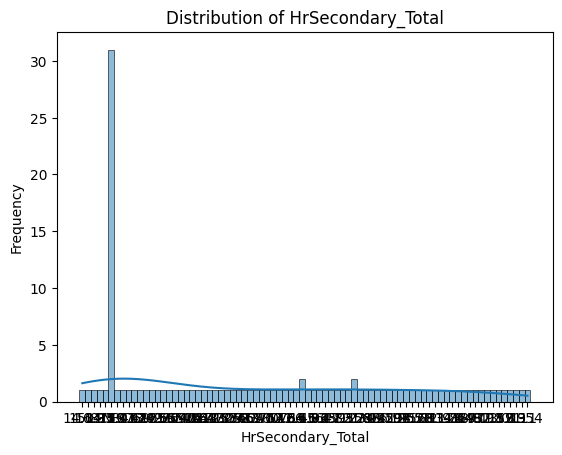

In [94]:
sns.histplot(data=df, x='HrSecondary_Total', kde=True)
plt.title('Distribution of HrSecondary_Total')
plt.xlabel('HrSecondary_Total')
plt.ylabel('Frequency')
plt.show()

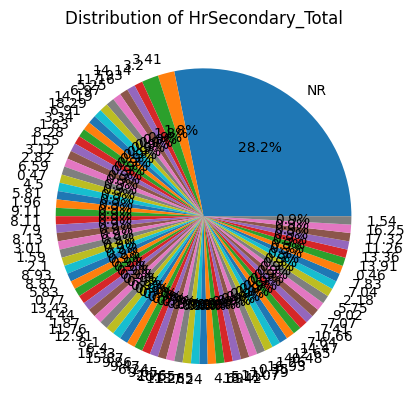

In [95]:
plt.pie(df['HrSecondary_Total'].value_counts(), labels=df['HrSecondary_Total'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of HrSecondary_Total')
plt.show()

In [96]:
numeric_columns = ['Primary_Boys', 'Primary_Girls', 'Upper Primary_Boys', 'Upper Primary_Girls', 'Secondary _Boys', 'Secondary _Girls', 'HrSecondary_Total']

In [97]:
df = df.replace('NR', np.nan)

In [98]:
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df = df.dropna()

In [99]:
X = df[['Primary_Boys', 'Primary_Girls', 'Upper Primary_Boys', 'Upper Primary_Girls', 'Secondary _Boys', 'Secondary _Girls']].values
y = df['HrSecondary_Total'].values

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
model = LinearRegression()

In [102]:
model.fit(X_train, y_train)

LinearRegression()

In [103]:
y_pred = model.predict(X_test)
y_pred

array([ 5.7642878 , 11.11475285,  2.12498153,  6.7107895 ,  4.11606537,
       10.852548  ,  9.83348718,  8.1653242 , 10.47101064,  1.93408761,
        7.5981133 ])

In [104]:
mse = mean_squared_error(y_test, y_pred)
mse

49.34601357406529

In [105]:
r2 = r2_score(y_test, y_pred)
r2

-0.6585253264908784

In [106]:
coefficients = model.coef_
coefficients

array([ 2.92724831, -2.60666292, -0.81958184, -0.18287236,  0.56954877,
       -0.18772213])

In [107]:
intercept = model.intercept_
intercept

3.0700357626282297

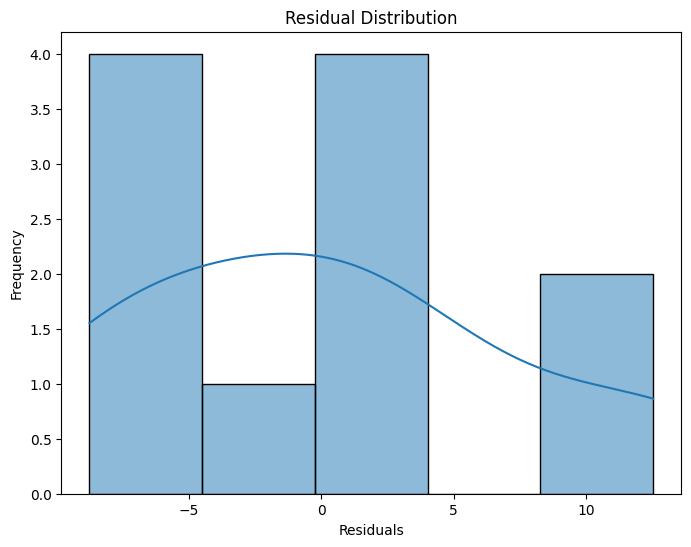

In [108]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

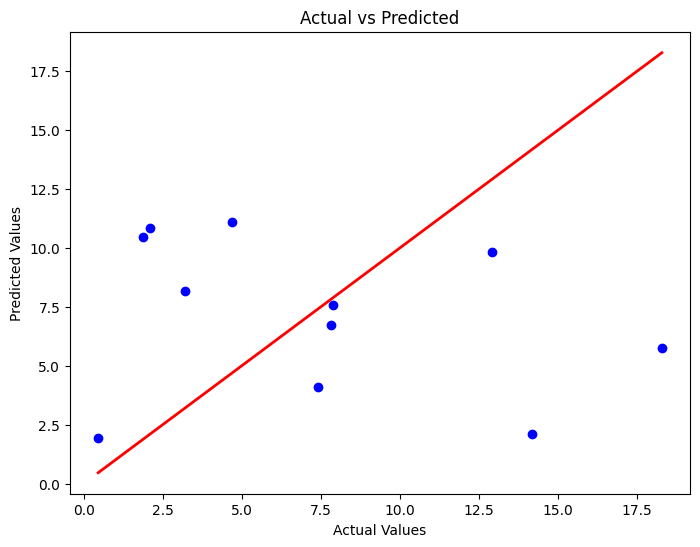

In [109]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

In [110]:
import pickle

# Save the model to a file
filename = 'trained_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [111]:
import pickle

# Load the saved model
model = pickle.load(open('trained_model.pkl', 'rb'))

def predict(input_data):
    # Preprocess input data (if required)
    # ...

    # Make predictions using the loaded model
    predictions = model.predict(input_data)

    # Return predictions
    return predictions

In [117]:
!pip install streamlit --quiet

In [118]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [122]:
import streamlit as st
import pickle

# Load your trained model
model = pickle.load(open('trained_model.pkl', 'rb'))

# Define the prediction function
def predict(Primary_Boys, Primary_Girls, Upper_Primary_Boys, Upper_Primary_Girls, Secondary_Boys, Secondary_Girls):
    input_data = [[Primary_Boys, Primary_Girls, Upper_Primary_Boys, Upper_Primary_Girls, Secondary_Boys, Secondary_Girls]]
    prediction = model.predict(input_data)
    return prediction[0]  # Return the prediction value

# Create the Streamlit app
st.title('Dropout Ratio Prediction')

# Input fields for user data
Primary_Boys = st.number_input('Enter Primary_Boys', value=0)
Primary_Girls = st.number_input('Enter Primary_Girls', value=0)
Upper_Primary_Boys = st.number_input('Enter Upper_Primary_Boys', value=0)
Upper_Primary_Girls = st.number_input('Enter Upper_Primary_Girls', value=0)
Secondary_Boys = st.number_input('Enter Secondary_Boys', value=0)
Secondary_Girls = st.number_input('Enter Secondary_Girls', value=0)

# Make prediction when the button is clicked
if st.button('Predict'):
    result = predict(Primary_Boys, Primary_Girls, Upper_Primary_Boys, Upper_Primary_Girls, Secondary_Boys, Secondary_Girls)
    st.success(f'The predicted HrSecondary_Total is: {result}')

2025-02-05 06:31:39.199 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 06:31:39.205 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 06:31:39.211 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 06:31:39.216 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 06:31:39.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 06:31:39.225 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 06:31:39.229 Session state does not function when running a script without `streamlit run`
2025-02-05 06:31:39.237 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 06:31

In [124]:
!pip install streamlit

In [125]:
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧
added 22 packages in 5s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧

In [126]:
!wget -q -O - ipv4.icanhazip.com

35.237.160.58


In [128]:
!streamlit run app.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
⠙⠹⠸⠼⠴⠦your url is: https://clean-pens-happen.loca.lt
^C
